In [1]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
ferti=pd.read_csv("FertilizerPrediction.csv",encoding ='latin1')
ferti.head(1)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea


In [3]:
a=ferti[['Crop Type','Nitrogen','Potassium','Phosphorous','Fertilizer Name']]

In [4]:
# a.to_csv("Fertilizer_Prediction.csv")

In [5]:
a

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,Maize,37,0,0,Urea
1,Sugarcane,12,0,36,DAP
2,Cotton,7,9,30,14-35-14
3,Tobacco,22,0,20,28-28
4,Paddy,35,0,0,Urea
...,...,...,...,...,...
94,Pulses,24,0,19,28-28
95,Tobacco,4,17,17,10-26-26
96,Wheat,39,0,0,Urea
97,Millets,15,0,41,DAP


In [6]:
a['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
a['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [8]:
# a = ['10-26-26','14-35-14', '17-17-17', '20-20', '28-28', 'DAP', 'Urea']
# a[6]

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a['Fertilizer_Name']=le.fit_transform(a['Fertilizer Name'])
a['Crop_Type']=le.fit_transform(a['Crop Type'])

C:\Users\Pratiksha Ramteke\AppData\Local\Temp\ipykernel_11152\190394235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Fertilizer_Name']=le.fit_transform(a['Fertilizer Name'])
C:\Users\Pratiksha Ramteke\AppData\Local\Temp\ipykernel_11152\190394235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Crop_Type']=le.fit_transform(a['Crop Type'])


In [10]:
a

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer_Name,Crop_Type
0,Maize,37,0,0,Urea,6,3
1,Sugarcane,12,0,36,DAP,5,8
2,Cotton,7,9,30,14-35-14,1,1
3,Tobacco,22,0,20,28-28,4,9
4,Paddy,35,0,0,Urea,6,6
...,...,...,...,...,...,...,...
94,Pulses,24,0,19,28-28,4,7
95,Tobacco,4,17,17,10-26-26,0,9
96,Wheat,39,0,0,Urea,6,10
97,Millets,15,0,41,DAP,5,4


In [11]:
a.to_csv("process_fer.csv")

In [12]:
a['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [13]:
a

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer_Name,Crop_Type
0,Maize,37,0,0,Urea,6,3
1,Sugarcane,12,0,36,DAP,5,8
2,Cotton,7,9,30,14-35-14,1,1
3,Tobacco,22,0,20,28-28,4,9
4,Paddy,35,0,0,Urea,6,6
...,...,...,...,...,...,...,...
94,Pulses,24,0,19,28-28,4,7
95,Tobacco,4,17,17,10-26-26,0,9
96,Wheat,39,0,0,Urea,6,10
97,Millets,15,0,41,DAP,5,4


In [14]:
a["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [15]:
dff_new=a[['Nitrogen','Potassium','Phosphorous','Fertilizer_Name']]

In [16]:
dff_new

,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,37,0,0,6
1,12,0,36,5
2,7,9,30,1
3,22,0,20,4
4,35,0,0,6
...,...,...,...,...
94,24,0,19,4
95,4,17,17,0
96,39,0,0,6
97,15,0,41,5


In [17]:
x=dff_new.drop(['Fertilizer_Name'],axis=1)#independent
y=dff_new['Fertilizer_Name']#dependent

In [18]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.3)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)

C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 100.0 %


<AxesSubplot:title={'center':'Logistic_Regression'}>

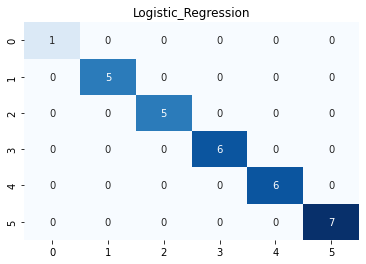

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [22]:
from sklearn import metrics
score_lr=round(metrics.accuracy_score(y_test,Y_pred_lr)*100,2)
score_lr_precision=metrics.precision_score(Y_pred_lr,y_test,average='macro')
score_lr_recall=round(metrics.recall_score(y_test,Y_pred_lr,average='macro')*100,2)
score_lr_f1_score=round(metrics.f1_score(y_test, Y_pred_lr,average='macro')*100,2)

In [23]:
import pickle
with open('model_fer_LR_newest.sav','wb') as f:
    pickle.dump(lr,f)

In [24]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

<AxesSubplot:title={'center':'SVM'}>

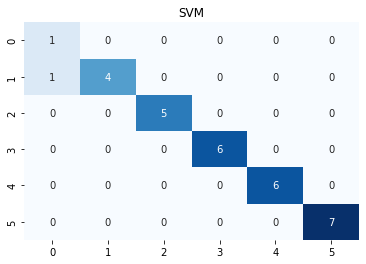

In [25]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [26]:
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 96.67 %


In [27]:
from sklearn import metrics
score_svm=round(metrics.accuracy_score(y_test,Y_pred_svm)*100,2)
score_svm_precision=metrics.precision_score(Y_pred_svm,y_test,average='macro')
score_svm_recall=round(metrics.recall_score(y_test,Y_pred_svm,average='macro')*100,2)
score_svm_f1_score=round(metrics.f1_score(y_test,Y_pred_svm,average='macro')*100,2)

In [28]:
import pickle
with open('model_fer_SVM_newest.sav','wb') as f:
    pickle.dump(sv,f)

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [30]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 96.67 %


<AxesSubplot:title={'center':'Naive Bayes'}>

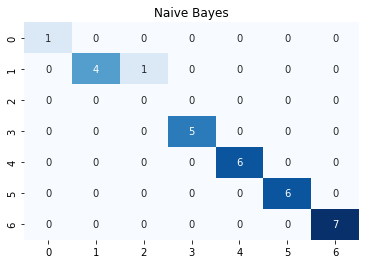

In [31]:
lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [32]:
from sklearn import metrics
score_nb=round(metrics.accuracy_score(y_test,Y_pred_nb)*100,2)
score_nb_precision=metrics.precision_score(Y_pred_nb,y_test,average='macro')
score_nb_recall=round(metrics.recall_score(y_test,Y_pred_nb,average='macro')*100,2)
score_nb_f1_score=round(metrics.f1_score(y_test,Y_pred_nb,average='macro')*100,2)

C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import pickle
with open('model_fer_NB_newest.sav','wb') as f:
    pickle.dump(nb,f)

In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 96.67 %


<AxesSubplot:title={'center':'Decision Tree'}>

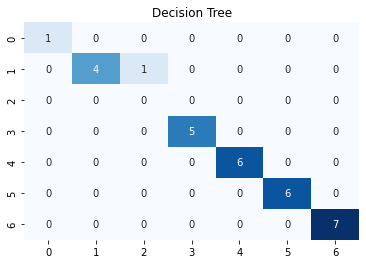

In [35]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [36]:
from sklearn import metrics
score_dt=round(metrics.accuracy_score(y_test,Y_pred_dt)*100,2)
score_dt_precision=metrics.precision_score(Y_pred_dt,y_test,average='macro')
score_dt_recall=round(metrics.recall_score(y_test,Y_pred_dt,average='macro')*100,2)
score_dt_f1_score=round(metrics.f1_score(y_test,Y_pred_dt,average='macro')*100,2)

C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import pickle
with open('model_fer_DT_newest.sav','wb') as f:
    pickle.dump(dt,f)

In [38]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


The accuracy score achieved using Random Forest is: 100.0 %


<AxesSubplot:title={'center':'Random Forest'}>

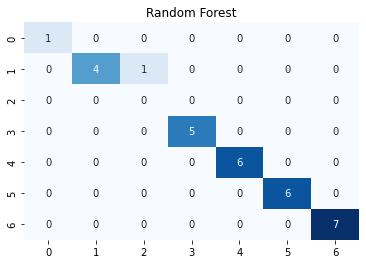

In [39]:
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [40]:
from sklearn import metrics
score_rf=round(metrics.accuracy_score(y_test,Y_pred_rf)*100,2)
score_rf_precision=metrics.precision_score(Y_pred_rf,y_test,average='macro')
score_rf_recall=round(metrics.recall_score(y_test,Y_pred_rf,average='macro')*100,2)
score_rf_f1_score=round(metrics.f1_score(y_test,Y_pred_rf,average='macro')*100,2)

In [41]:
import pickle
with open('model_rf_RF_newest.sav','wb') as f:
    pickle.dump(rfc,f)

In [42]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada.fit(x_train, y_train)

ada.score(x_test,y_test)
predictions = ada.predict(x_test)

In [43]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Ada Boost is: "+str(score_ada)+" %")

The accuracy score achieved using Ada Boost is: 96.67 %


<AxesSubplot:title={'center':'ADA Boost'}>

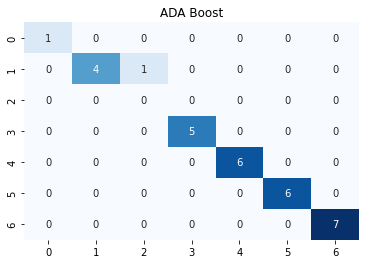

In [44]:
lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [45]:
from sklearn import metrics
score_ada=round(metrics.accuracy_score(y_test,predictions)*100,2)
score_ada_precision=metrics.precision_score(predictions,y_test,average='macro')
score_ada_recall=round(metrics.recall_score(y_test,predictions,average='macro')*100,2)
score_ada_f1_score=round(metrics.f1_score(y_test,predictions,average='macro')*100,2)

C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
import pickle
with open('model_fer_ADA_newest.sav','wb') as f:
    pickle.dump(ada,f)

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=x_train.shape[1:],activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(7,activation='sigmoid'),
])

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 1.8893 - accuracy: 0.2174
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 1.7924 - accuracy: 0.2319
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7193 - accuracy: 0.2899
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 1.6611 - accuracy: 0.3478
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6151 - accuracy: 0.3478
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5693 - accuracy: 0.4348
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 1.5315 - accuracy: 0.4783
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4941 - accuracy: 0.5217
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4570 - accuracy: 0.5217
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4259 - accuracy: 0.5217
Epoch 11/100
3/3 [===========

In [50]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9333


[0.23931564390659332, 0.9333333373069763]

In [51]:
pred=model.predict(x_test)

In [52]:
pred=np.argmax(pred, axis=1)

In [53]:
pred

array([5, 4, 5, 1, 4, 6, 4, 4, 3, 6, 5, 3, 4, 4, 6, 5, 5, 1, 4, 6, 6, 6,
       1, 0, 5, 6, 3, 1, 1, 4], dtype=int64)

In [54]:
y_test

28    5
61    3
89    5
75    1
72    4
60    6
13    4
47    4
20    3
18    6
53    5
66    3
76    4
8     4
7     6
74    5
1     5
67    1
3     4
87    6
71    6
92    6
80    1
68    0
97    5
32    6
83    3
2     1
41    1
29    3
Name: Fertilizer_Name, dtype: int32

In [55]:
import pandas as pd
# Crop Type Nitrogen Potassium Phosphorous Fertilizer Name Fertilizer_Name Crop_Type
#  Maize      37        0          0             Urea          6             3
# Sugarcane   12        0         36             DAP           5             8

dff = pd.read_csv("process_fer.csv")

'Crop_Type','Nitrogen','Potassium','Phosphorous'

dict = {'Crop-type':8,
        'Nitrogen':12,
        'Potassium':0,
        'Phosphorous':36,
        'Fertilizer_Name':6}
dff1=pd.DataFrame(dict,index=[0])

In [56]:
dff.head()

,Unnamed: 0,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer_Name,Crop_Type
0,0,Maize,37,0,0,Urea,6,3
1,1,Sugarcane,12,0,36,DAP,5,8
2,2,Cotton,7,9,30,14-35-14,1,1
3,3,Tobacco,22,0,20,28-28,4,9
4,4,Paddy,35,0,0,Urea,6,6


In [57]:
a = dff[dff['Crop Type']=="Maize"]
a = a[['Crop Type','Crop_Type']]
a = a['Crop_Type'].unique()
a[0]

3

In [58]:
dff["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [59]:
filename8='model_fer_ADA_newest.sav'
loaded_model7=  pickle.load(open(filename8, 'rb'))

In [61]:
fer_lst = ['10-26-26','14-35-14', '17-17-17', '20-20', '28-28', 'DAP', 'Urea']
# fer_lst = ['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20','10-26-26']
pred_adb=loaded_model7.predict([[12,0,36]])
print("printing pred_adb")
print(pred_adb)
adb_output=pred_adb
print("printing adb_output")
print(adb_output)
op = fer_lst[int(adb_output)]
print("printing op")
print(op)
# flash("Recommended Fertilizer for crop is: "+str(op))

printing pred_adb
[5]
printing adb_output
[5]
printing op
DAP


C:\Users\Pratiksha Ramteke\anaconda3\envs\project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
